In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank_note_data.csv')
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
for col in df.columns:
    print(df[col].nunique(), end = '\t:')
    print(col)

1338	:Image.Var
1256	:Image.Skew
1270	:Image.Curt
1156	:Entropy
2	:Class


## <font color = 'red'>Splitting data</font>

In [5]:
features = list(df.columns)[:-1]
target = list(df.columns)[-1]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_norm = df.copy()
df_norm[features] = scaler.fit_transform(df[features])  #Normalizing accept Target column

## <font color = 'red'>TSNE</font>

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=500, n_components = 2)

x_tsne = tsne.fit_transform(df_norm[features])

In [8]:
x_tsne

array([[  6.779022,  12.866826],
       [  5.889649,  16.972612],
       [-56.152985,  18.085865],
       ...,
       [-41.664043, -38.345547],
       [-35.361973, -32.76886 ],
       [ 34.74728 ,  16.971354]], dtype=float32)

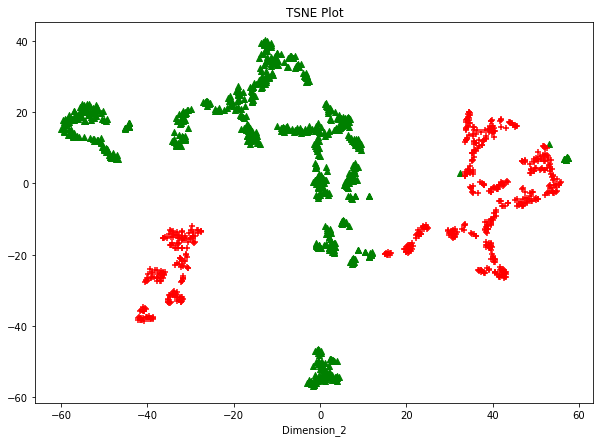

In [9]:
plt.figure(figsize = (10,7))
plt.scatter(x_tsne[np.where(df[target] == 0), 0], x_tsne[np.where(df[target] == 0), 1], color = 'g', marker = '^')
plt.scatter(x_tsne[np.where(df[target] == 1), 0], x_tsne[np.where(df[target] == 1), 1], color = 'r', marker = '+')
plt.xlabel('Dimension_1')
plt.xlabel('Dimension_2')
plt.title('TSNE Plot')
plt.show()